# Data Initializing

In [3]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import pickle
import itertools

In [4]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
from platform import python_version
print('python', python_version())
print('numpy', np.__version__)
print('pandas', pd.__version__)
import numba
print('numba', numba.__version__)

/home/mkub/anaconda3/bin/python
3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
python 3.7.6
numpy 1.18.1
pandas 1.0.3
numba 0.49.0


In [11]:
import importlib
importlib.reload(dh)
importlib.reload(md)

<module 'model' from '/home/mkub/Meruza_ubuntu/GitHub/TransportNet/Stochastic Nash-Wardrop equilibrium/model.py'>

In [2]:
net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'
stoch_save = 'results/'

In [3]:
handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)
print('total_od_flow =', total_od_flow)
graph_data['graph_table'].head()

total_od_flow = 104694.4


,init_node,init_node_thru,term_node,term_node_thru,capacity,free_flow_time
0,1,False,117,True,9000.0,1.090458
1,2,False,87,True,9000.0,1.090458
2,3,False,74,True,9000.0,1.090458
3,4,False,233,True,9000.0,1.090458
4,5,False,165,True,9000.0,1.090458


# Experiment № 1

In [4]:
gammas = np.r_[np.linspace(1.0, 0.2, 9), np.logspace(-1, -4, 10)]
gammas

array([1.00000000e+00, 9.00000000e-01, 8.00000000e-01, 7.00000000e-01,
       6.00000000e-01, 5.00000000e-01, 4.00000000e-01, 3.00000000e-01,
       2.00000000e-01, 1.00000000e-01, 4.64158883e-02, 2.15443469e-02,
       1.00000000e-02, 4.64158883e-03, 2.15443469e-03, 1.00000000e-03,
       4.64158883e-04, 2.15443469e-04, 1.00000000e-04])

### $\epsilon = 10^{-3}$

### Universal Similar Triangles Method

In [5]:
gammas = np.r_[np.linspace(1.0, 0.2, 9), np.logspace(-1, -4, 10)]
max_iter = 1000
eps = 1e-3
    
model = md.Model(graph_data, graph_correspondences, total_od_flow, mu = 0.25, rho = 0.15)
assert(model.mu == 0.25)

for index, gamma in enumerate(gammas):
    tic = time.time()
    model.gamma = gamma
    verbose_step = 5 if index <= 8 else 10
    print('gamma =', model.gamma)
    print('verbose step = ', verbose_step)
    solver_kwargs = {'eps': eps,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap_rel',
                     'verbose' : True, 'verbose_step': verbose_step, 'save_history' : True}
    result = model.find_equilibrium(solver_name = 'ustm', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

    result['eps'] = eps
    result['gamma'] = model.gamma
    result['elapsed_time'] = toc - tic
    with open(stoch_save + 'anaheim_result_' + 'ustm' + '_eps_1e-3_gamma_' + str(index) + '_beckmann.pickle', 'wb') as f:
        pickle.dump(result, f)

gamma = 1.0
verbose step =  5
Composite optimization...
Oracles created...
Universal similar triangles method...


<string>:3: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, C))


Primal_init = 1.90561e+11
Dual_init = 1.25905e+06
Duality_gap_init = 1.90562e+11

Result: success
Total iters: 4
Primal_func_value = 6.29208e+07
Dual_func_value = -352585
Duality_gap = 6.25682e+07
Duality_gap / Duality_gap_init = 0.000328335
Oracle elapsed time: 38 sec
Elapsed time: 40 sec
Time ratio = 5.978117885274577
Flow excess = 7.649613649673725

gamma = 0.9
verbose step =  5
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 2.06723e+11
Dual_init = 596823
Duality_gap_init = 2.06723e+11

Result: success
Total iters: 4
Primal_func_value = 1.97759e+07
Dual_func_value = -612305
Duality_gap = 1.91636e+07
Duality_gap / Duality_gap_init = 9.27016e-05
Oracle elapsed time: 24 sec
Elapsed time: 24 sec
Time ratio = 5.107843395763246
Flow excess = 6.595463246901096

gamma = 0.8
verbose step =  5
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 1.93811e+11
Dual_init = -25909.9
Duality_gap_init = 1.9


Iterations number: 10
Inner iterations number: 10
Primal_func_value = 1.29354e+06
Dual_func_value = -1.26355e+06
Duality_gap = 29989
Duality_gap / Duality_gap_init = 0.628865

Iterations number: 20
Inner iterations number: 24
Primal_func_value = 1.28609e+06
Dual_func_value = -1.28542e+06
Duality_gap = 670.372
Duality_gap / Duality_gap_init = 0.0140576

Result: success
Total iters: 27
Primal_func_value = 1.28591e+06
Dual_func_value = -1.28587e+06
Duality_gap = 38.0903
Duality_gap / Duality_gap_init = 0.000798749
Oracle elapsed time: 175 sec
Elapsed time: 175 sec
Time ratio = 3.250923620240902
Flow excess = 0.9975685824714304

gamma = 0.004641588833612782
verbose step =  10
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 1.29595e+06
Dual_init = -1.24809e+06
Duality_gap_init = 47862.5

Iterations number: 10
Inner iterations number: 10
Primal_func_value = 1.29444e+06
Dual_func_value = -1.25877e+06
Duality_gap = 35667.5
Duality_gap / Duality


Iterations number: 70
Inner iterations number: 121
Primal_func_value = 1.28607e+06
Dual_func_value = -1.28594e+06
Duality_gap = 126.992
Duality_gap / Duality_gap_init = 0.00264509

Iterations number: 80
Inner iterations number: 142
Primal_func_value = 1.28605e+06
Dual_func_value = -1.28598e+06
Duality_gap = 70.8808
Duality_gap / Duality_gap_init = 0.00147637

Result: success
Total iters: 87
Primal_func_value = 1.28605e+06
Dual_func_value = -1.286e+06
Duality_gap = 47.1056
Duality_gap / Duality_gap_init = 0.000981157
Oracle elapsed time: 850 sec
Elapsed time: 850 sec
Time ratio = 3.238285755027662
Flow excess = 0.9985269942549109



### Universal Gradient Descent

In [5]:
gammas = np.r_[np.linspace(1.0, 0.2, 9), np.logspace(-1, -4, 10)]
max_iter = 1000
eps = 1e-3
    
model = md.Model(graph_data, graph_correspondences, total_od_flow, mu = 0.25, rho = 0.15)
assert(model.mu == 0.25)

for index, gamma in enumerate(gammas):
    tic = time.time()
    model.gamma = gamma
    verbose_step = 5 if index <= 8 else 10
    print('gamma =', model.gamma)
    print('verbose step = ', verbose_step)
    solver_kwargs = {'eps': eps,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap_rel',
                     'verbose' : True, 'verbose_step': verbose_step, 'save_history' : True}
    result = model.find_equilibrium(solver_name = 'ugd', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

    result['eps'] = eps
    result['gamma'] = model.gamma
    result['elapsed_time'] = toc - tic
    with open(stoch_save + 'anaheim_result_' + 'ugd' + '_eps_1e-3_gamma_' + str(index) + '_beckmann.pickle', 'wb') as f:
        pickle.dump(result, f)

gamma = 1.0
verbose step =  5
Composite optimization...
Oracles created...
Universal gradient descent method...


<string>:3: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, C))


Primal_init = 1.90561e+11
Dual_init = 1.25905e+06
Duality_gap_init = 1.90562e+11

Result: success
Total iters: 4
Primal_func_value = 1.05387e+08
Dual_func_value = -237107
Duality_gap = 1.0515e+08
Duality_gap / Duality_gap_init = 0.000551787
Oracle elapsed time: 41 sec
Elapsed time: 43 sec
Time ratio = 5.034271148347076
Flow excess = 9.606796075931292

gamma = 0.9
verbose step =  5
Composite optimization...
Oracles created...
Universal gradient descent method...
Primal_init = 2.06723e+11
Dual_init = 596823
Duality_gap_init = 2.06723e+11

Result: success
Total iters: 4
Primal_func_value = 4.92996e+07
Dual_func_value = -572704
Duality_gap = 4.87269e+07
Duality_gap / Duality_gap_init = 0.000235711
Oracle elapsed time: 25 sec
Elapsed time: 25 sec
Time ratio = 4.555922142237403
Flow excess = 8.68788872670593

gamma = 0.8
verbose step =  5
Composite optimization...
Oracles created...
Universal gradient descent method...
Primal_init = 1.93811e+11
Dual_init = -25909.9
Duality_gap_init = 1.93811


Iterations number: 10
Inner iterations number: 10
Primal_func_value = 1.28575e+06
Dual_func_value = -1.27431e+06
Duality_gap = 11448.6
Duality_gap / Duality_gap_init = 0.246361

Iterations number: 20
Inner iterations number: 30
Primal_func_value = 1.28374e+06
Dual_func_value = -1.28325e+06
Duality_gap = 485.96
Duality_gap / Duality_gap_init = 0.0104573

Iterations number: 30
Inner iterations number: 50
Primal_func_value = 1.28369e+06
Dual_func_value = -1.28334e+06
Duality_gap = 356.041
Duality_gap / Duality_gap_init = 0.00766158

Iterations number: 40
Inner iterations number: 70
Primal_func_value = 1.28366e+06
Dual_func_value = -1.28338e+06
Duality_gap = 280.617
Duality_gap / Duality_gap_init = 0.00603854

Iterations number: 50
Inner iterations number: 90
Primal_func_value = 1.28365e+06
Dual_func_value = -1.28341e+06
Duality_gap = 234.931
Duality_gap / Duality_gap_init = 0.00505544

Iterations number: 60
Inner iterations number: 110
Primal_func_value = 1.28363e+06
Dual_func_value = -1

KeyboardInterrupt: 

## Plots

In [3]:
import numpy as np
import pickle
stoch_save = 'results/'

In [46]:
results = {}

for method in ['ustm', 'ugd']:
    results[method] = {}
    results[method]['iters'] = []
    results[method]['inner_iters'] = []
    results[method]['gammas'] = []
    results[method]['flows_arrs'] = []
    results[method]['dual_gaps_arrs'] = []
    i = 0
    while True:
        try:
            with open(stoch_save + 'anaheim_result_' + method + '_eps_1e-3_gamma_' +
                      str(i) + '_beckmann.pickle', 'rb') as f:
                result = pickle.load(f)
                results[method]['gammas'].append(result['gamma'])
                results[method]['iters'].append(result['iter_num'])
                results[method]['flows_arrs'].append(result['flows'])
                results[method]['dual_gaps_arrs'].append(result['history'].get('dual_gap'))
                results[method]['inner_iters'].append(result['history'].get('inner_iters')[-1])       
        except FileNotFoundError:
            break
        i += 1

__Checking the result with the answer from https://github.com/bstabler/TransportationNetworks__ 

In [5]:
import data_handler as dh
handler = dh.DataHandler()
answer = handler.ReadAnswer('Anaheim_flow.tntp')
flows_star = answer['flows']

In [15]:
deltas = {}
for method in ['ustm', 'ugd']:
    deltas[method] = []
    for flows in results[method]['flows_arrs']:
        deltas[method].append(np.linalg.norm(flows - flows_star, ord = 1) / np.linalg.norm(flows_star, ord = 1))
deltas

{'ustm': [3.1737809616241752,
  2.434290828357471,
  2.494279839298022,
  1.5865082202567105,
  0.9245977003877417,
  0.39537338717686976,
  0.21992833503159,
  0.13735956982010647,
  0.0780546526503893,
  0.04266463376796502,
  0.02814833521686508,
  0.0184948994303177,
  0.013303829085949978,
  0.01028320988414799,
  0.008297749297432254,
  0.006756924279932687,
  0.005387181370945998,
  0.004280927633378677,
  0.003182899810394237],
 'ugd': [3.30296436142253,
  2.713554746260816,
  1.9541545622684533,
  1.7267872161258646,
  0.9878469019421507,
  0.3840977040658054,
  0.21986521129016073,
  0.1372785309029286,
  0.07806906778905756,
  0.04274927843659278]}

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

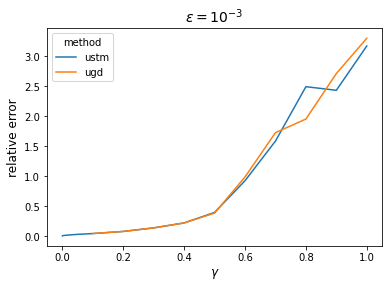

In [27]:
epsilon = 1e-3

for method in ['ustm', 'ugd']:
    plt.plot(results[method]['gammas'], deltas[method], label = method)
plt.legend(title = 'method')
plt.title(r'$\varepsilon = 10^{-3}$', fontsize = 14)
plt.xlabel(r'$\gamma$', fontsize = 12)
plt.ylabel(r'relative error', fontsize = 12)
#plt.savefig('anaheim_error_vs_gamma_eps_1e-3.png', dpi=300)
plt.show()

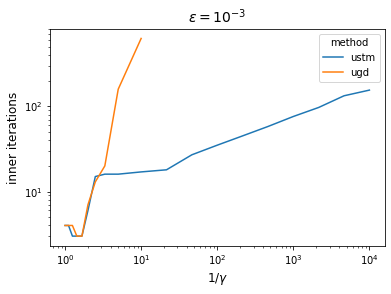

In [34]:
for method in ['ustm', 'ugd']:
    plt.plot(1. / np.array(results[method]['gammas']), results[method]['inner_iters'], label = method)
plt.legend(title = 'method')
plt.title(r'$\varepsilon = 10^{-3}$', fontsize = 14)
plt.xlabel(r'$1 / \gamma$', fontsize = 12)
plt.ylabel(r'inner iterations', fontsize = 12)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('anaheim_inner_iters_vs_gamma_eps_1e-3.png', dpi=300)
plt.show()

In [60]:
index = 9
print('gamma =', results[method]['gammas'][index])

gamma = 0.1


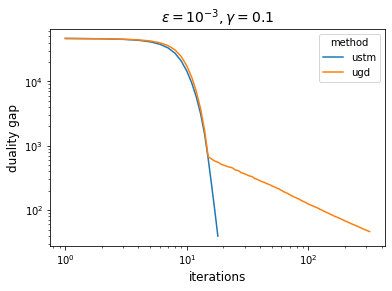

In [61]:
for method in ['ustm', 'ugd']:
    dual_gap_hist = results[method]['dual_gaps_arrs'][index]
    plt.plot(np.arange(len(dual_gap_hist)) + 1, dual_gap_hist, label = method)
plt.legend(title = 'method')
plt.title(r'$\varepsilon = 10^{-3}, \gamma = 0.1$', fontsize = 14)
plt.xlabel(r'iterations', fontsize = 12)
plt.ylabel(r'duality gap', fontsize = 12)
plt.xscale('log')
plt.yscale('log')
plt.show()

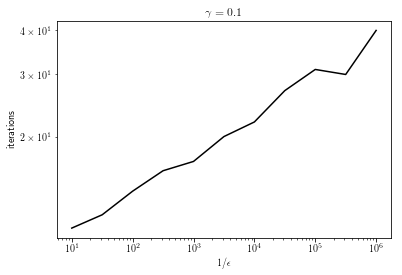

In [70]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / epsilons, iter_nums_for_epsilons, 'black')
plt.xlabel(r'$1 / \epsilon$')
plt.ylabel(r'iterations')
plt.title(r'$\gamma = {0}$'.format(gamma_for_epsilons))
plt.savefig('anaheim_iters_vs_eps_{0:.0e}.png'.format(gamma_for_epsilons), 
            dpi = 300)
plt.show()